In [1]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 

%matplotlib inline 

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,20))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

def ShowHistogram(image, Title = "Color Histogram", ChannelList = ["Channel 1", "Channel 2", "Channel 3"]):
    fig, ax = plt.subplots(figsize=(20, 10))

    if(len(image.shape) == 3):
        color = ('r', 'g', 'b')
        for channel,col in enumerate(color):
            histr = cv2.calcHist([image],[channel],None,[256],[0,256])
            ax.plot(histr,color = col, label = ChannelList[channel])

        plt.title(Title)
        plt.legend()
    else:
        histr = cv2.calcHist([image],[0],None,[256],[0,256])
        plt.plot(histr,color = "gray", label = "Gray")
        plt.title("Gray Histogram")
        plt.legend()

  # Set axis ranges; by default this will put major ticks every 25.
    ax.set_xlim(0, 255)

  # Change major ticks to show every 20.
    ax.xaxis.set_major_locator(MultipleLocator(20))

  # Change minor ticks to show every 5. (20/4 = 5)
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))

  # Turn grid on for both major and minor ticks and style minor slightly
  # differently.
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    plt.show()

# Bài 1

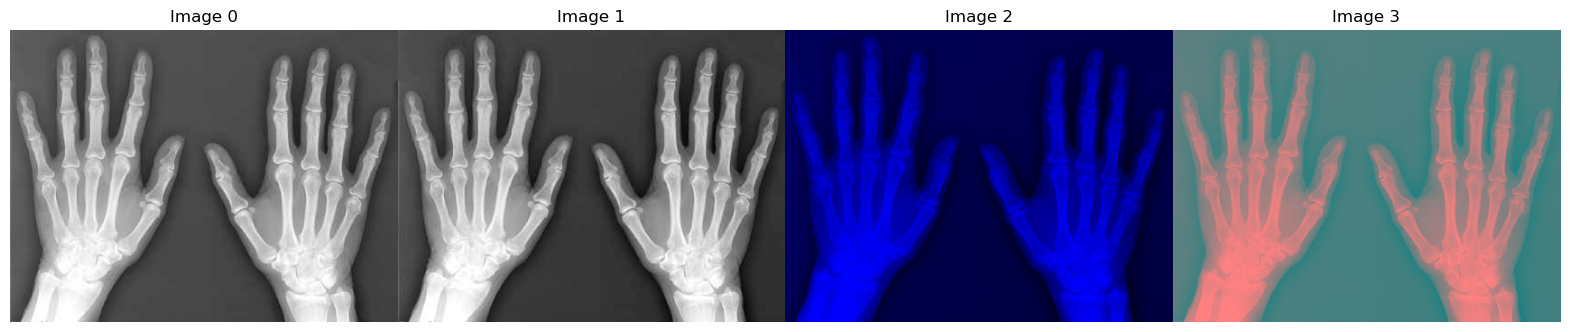

In [4]:
#Read image in RGB color space
img1_og = plt.imread("C:/Users/trand/Documents/Digital Image Processing/Biến hình xử lý ảnh/lab01/data/Hand.jpg")

#Convert into gray
img1_gray = cv2.cvtColor(img1_og,cv2.COLOR_RGB2GRAY)
#Conver into HSV color space
img1_HSV = cv2.cvtColor(img1_og,cv2.COLOR_RGB2HSV)
#Conver into YCbCr color space
img1_YCbCr = cv2.cvtColor(img1_og,cv2.COLOR_BGR2YCrCb)

#show all of the images
ShowImage([img1_og,img1_gray,img1_HSV,img1_YCbCr],1,4)

In [5]:
img1_gray

array([[ 98,  98,  97, ...,  71,  71,  71],
       [ 98,  98,  97, ...,  71,  71,  71],
       [ 98,  98,  97, ...,  71,  71,  71],
       ...,
       [120,  81,  79, ...,  62,  62,  62],
       [106,  72,  76, ...,  62,  62,  62],
       [103,  81, 103, ...,  62,  62,  62]], dtype=uint8)

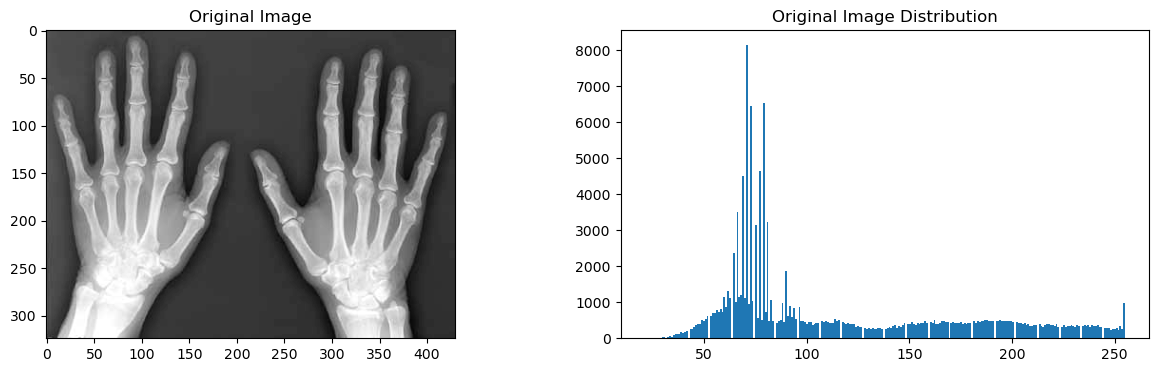

In [6]:
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img1_gray, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(img1_gray.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')


# Global Thresholding

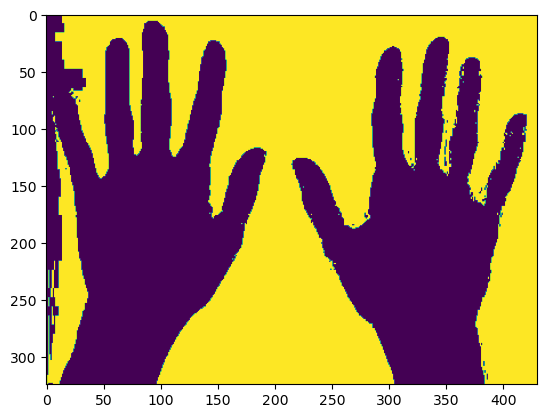

In [8]:
plt.imshow(mask)

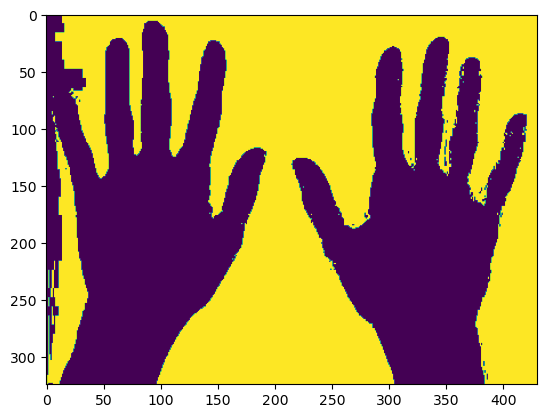

In [7]:
mask = cv2.inRange(img1_gray,30 ,90)
plt.imshow(mask)

In [9]:
def p_tile_threshold(image, pct):
    n_pixels = pct * image.shape[0] * image.shape[1]
    hist = np.histogram(image, bins=range(256))[0]
    hist = np.cumsum(hist)

    return np.argmin(np.abs(hist - n_pixels))

96


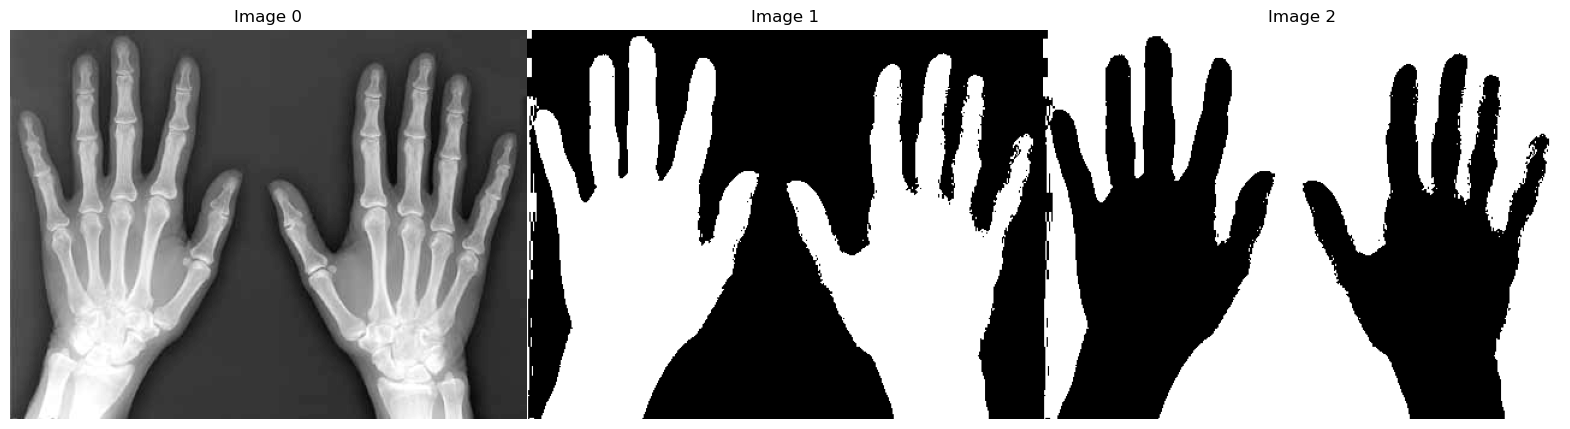

In [10]:
T = p_tile_threshold(img1_gray, pct = 0.55)
print(T)

mask_obj = img1_gray > T
mask_bg = img1_gray <= T
ShowImage([img1_gray, mask_obj, mask_bg],1,3)

In [11]:
def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(gray, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1

    WBackground = []
    WForeground = []
    Values = []
  
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2
      # print("Wb", Wb, "Wf", Wf)
      # print("t", t, "value", value)
        WBackground.append(Wb)
        WForeground.append(Wf)
        Values.append(value)

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh, [WBackground, WForeground, Values]



97


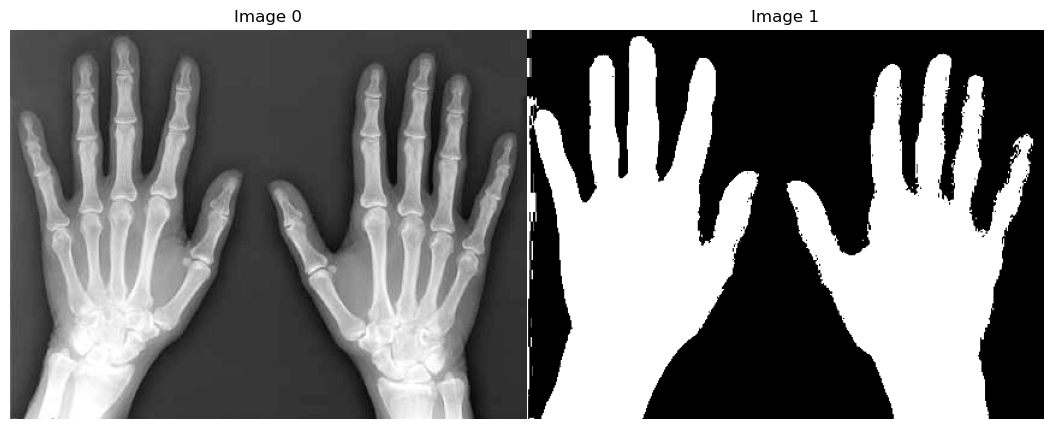

In [12]:
final_img, final_thresh, parms = otsu(img1_gray)
ShowImage([img1_gray, final_img],1,3)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.1777203560149294e-06, 1.4355440712029859e-05, 2.1533161068044788e-05, 2.8710881424059718e-05, 5.024404249210451e-05, 9.331036462819408e-05, 0.00016508756818834337, 0.0002440424921045076, 0.00039477461958082114, 0.0006603502727533735, 0.0008756818834338214, 0.0011699684180304336, 0.0015647430376112546, 0.0019164513350559862, 0.0024834912431811657, 0.003244329600918748, 0.004163077806488659, 0.004995693367786391, 0.006302038472581108, 0.007378696525983348, 0.00867786391042205, 0.010041630778064886, 0.011871949468848694, 0.013781223083548665, 0.016006316393913294, 0.018726672408842952, 0.021583405110536892, 0.024382716049382715, 0.02794286534596612, 0.03147430376112546, 0.0353861613551536, 0.03973585989089865, 0.0441358024691358, 0.04908125179443009, 0.05404823428079242, 0.05978323284524835, 0.06510192362905541, 0.0709158771174275, 0.0760623026126902, 0.0843812805053115, 0.090633074

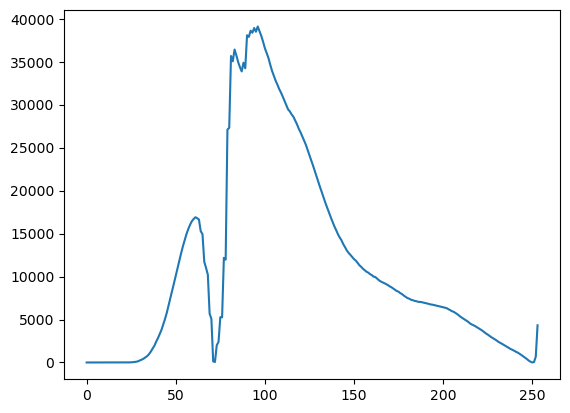

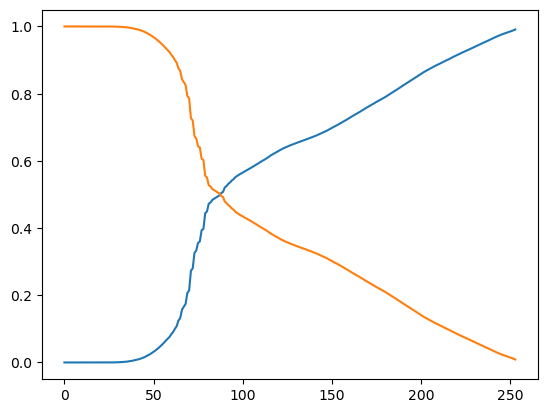

In [13]:
WBackground, WForeground, Values = parms[0], parms[1], parms[2]
print(WBackground)
print(WForeground)
print(Values)

plt.plot(Values)
plt.show()
plt.plot(WBackground)
plt.plot(WForeground)
plt.show()

In [14]:
def two_peaks_threshold(image, smooth_hist=True, sigma=5):
    from scipy.ndimage import gaussian_filter
    
    hist = np.histogram(image, bins=range(256))[0].astype(np.float)
    plt.plot(hist)
    plt.show()

    if smooth_hist:
        hist = gaussian_filter(hist, sigma=sigma)
        plt.plot(hist)
        plt.show()

    f_peak = np.argmax(hist)

    # finding second peak
    s_peak = np.argmax((np.arange(len(hist)) - f_peak) ** 2 * hist)

    thr = np.argmin(hist[min(f_peak, s_peak): max(f_peak, s_peak)])
    thr += min(f_peak, s_peak)

    final_img = image.copy()
    print(thr)
    final_img[image > thr] = 255
    final_img[image < thr] = 0

    return final_img, thr, hist

C:\Users\trand\AppData\Local\Temp\ipykernel_22564\2447925643.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hist = np.histogram(image, bins=range(256))[0].astype(np.float)


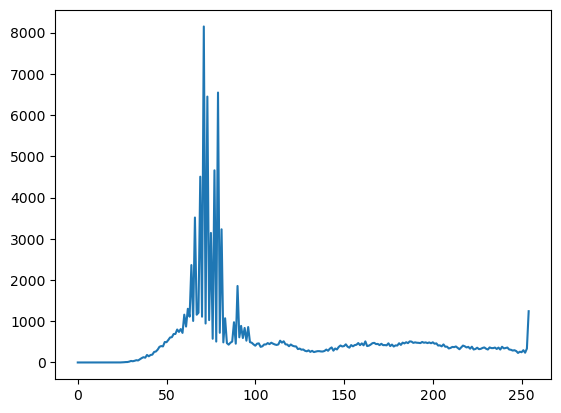

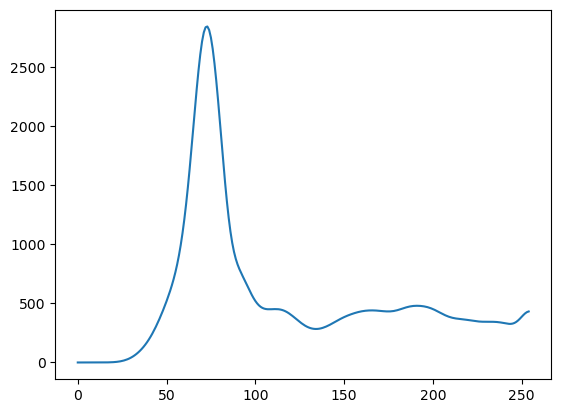

134


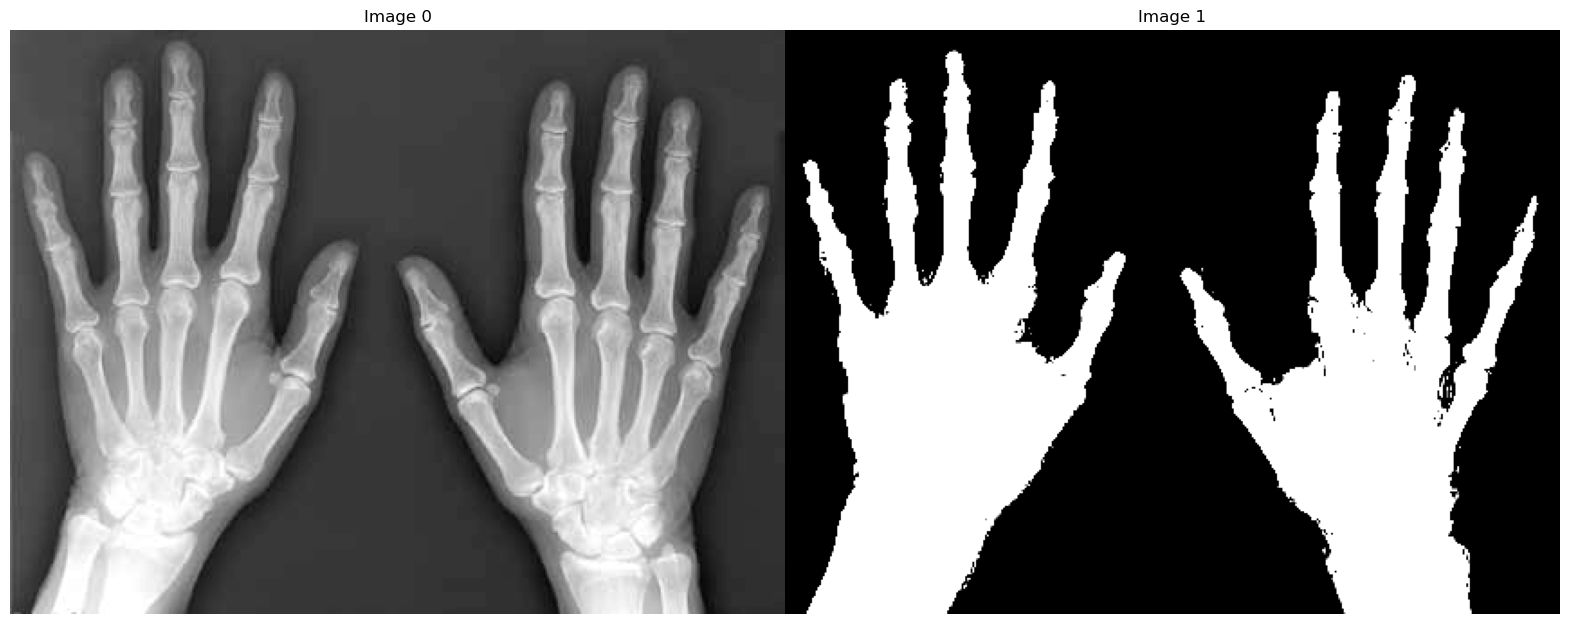

In [15]:
final_img, final_thresh, hist = two_peaks_threshold(img1_gray)
ShowImage([img1_gray, final_img],1,2)

C:\Users\trand\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


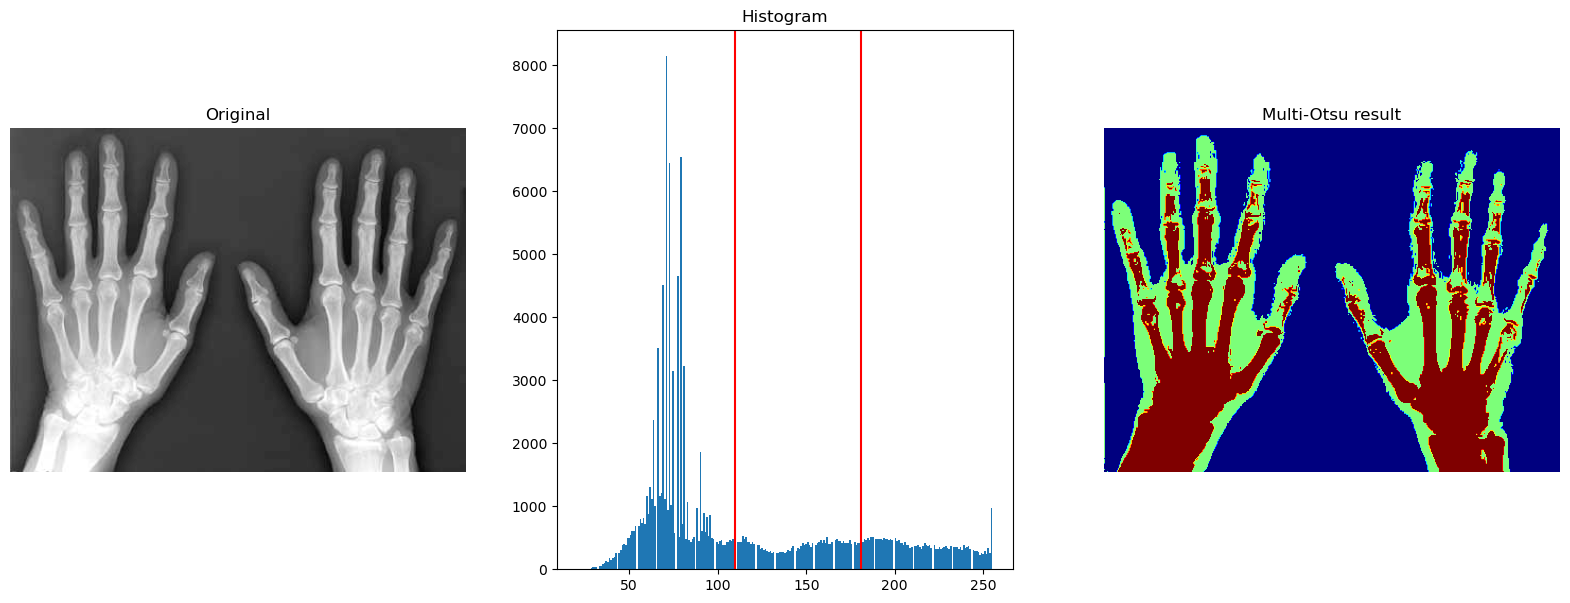

In [16]:
from skimage.filters import threshold_multiotsu
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(img1_gray)
# Using the threshold values, we generate the three regions.
regions = np.digitize(img1_gray, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
# Plotting the original image.
ax[0].imshow(img1_gray, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img1_gray.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')
# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')
plt.subplots_adjust()
plt.show()

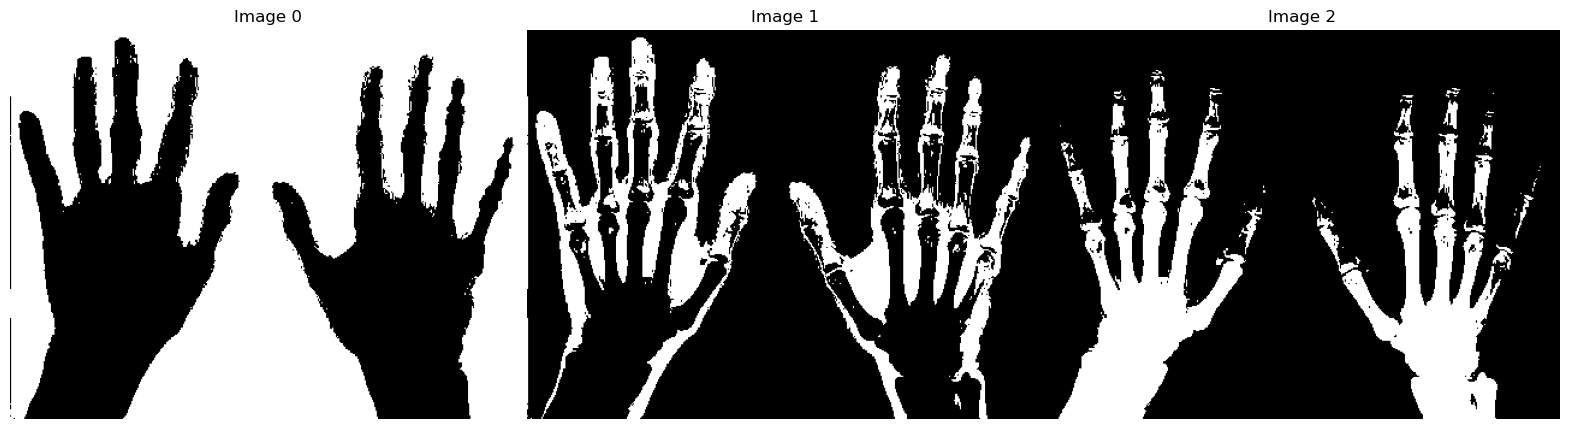

In [17]:
Segments = []
for idx in list(np.unique(regions)):
    mask = regions == idx
    Segments.append(mask)

ShowImage(Segments, 1, len(Segments))

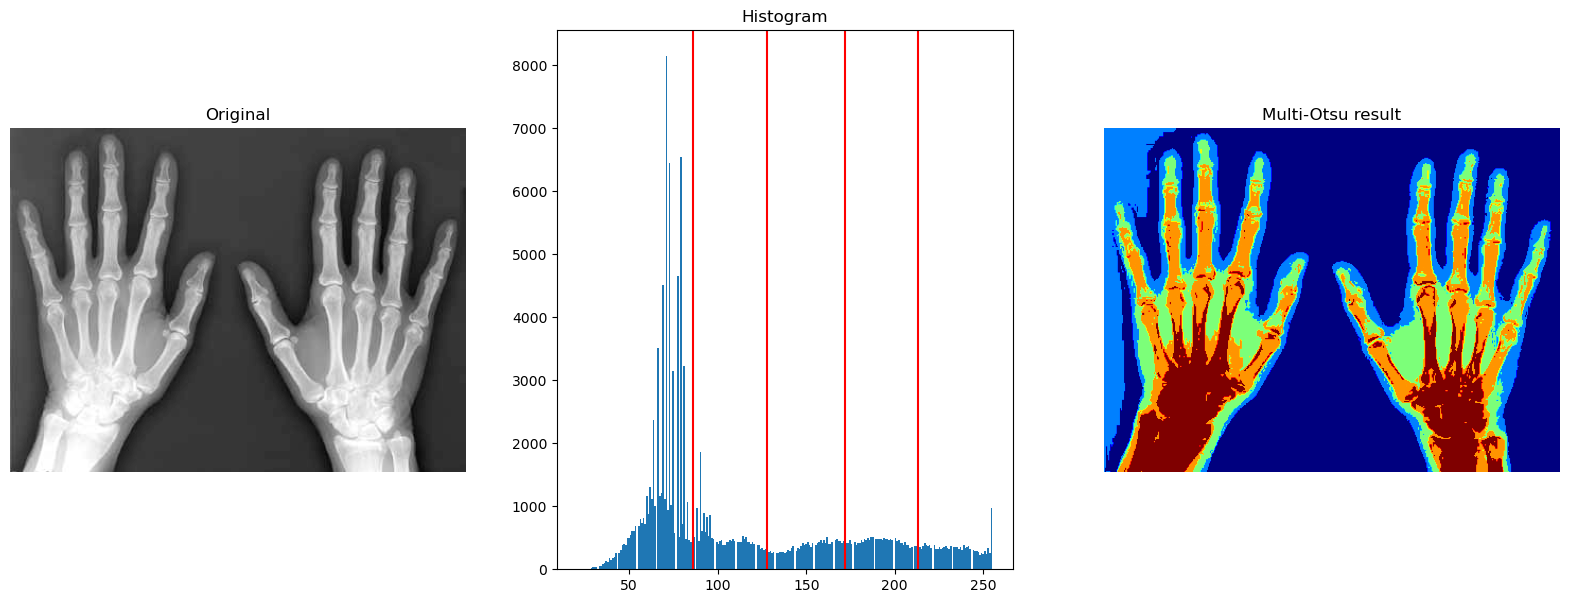

In [20]:
thresholds = threshold_multiotsu(img1_gray, classes=5)
regions = np.digitize(img1_gray, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
# Plotting the original image.
ax[0].imshow(img1_gray, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img1_gray.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')
# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')
plt.subplots_adjust()
plt.show()

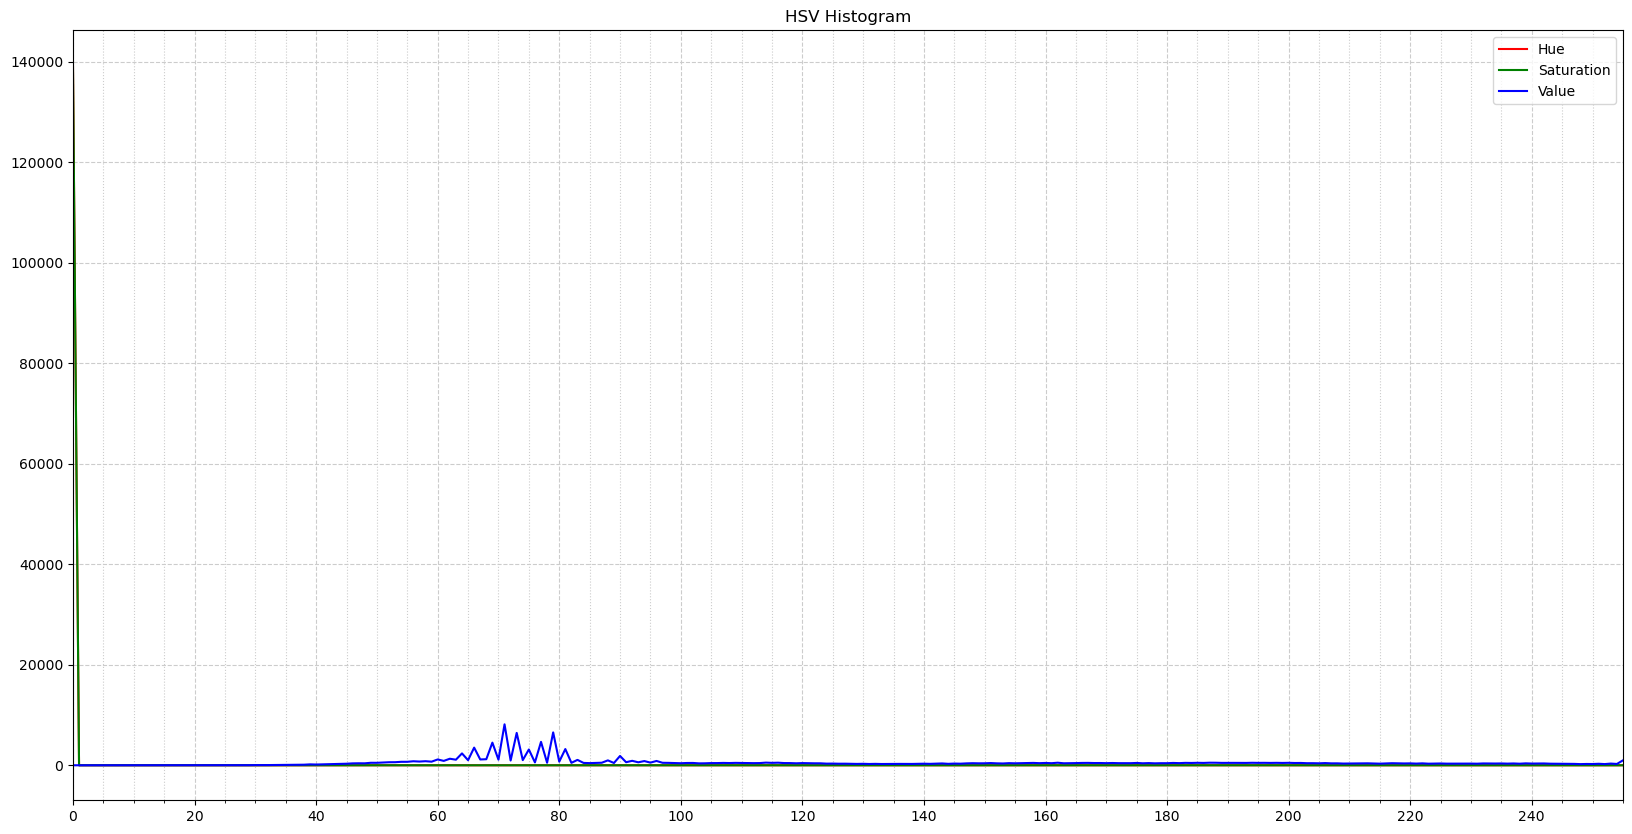

In [163]:
ShowHistogram(img1_HSV, Title = "HSV Histogram", ChannelList = ["Hue", "Saturation", "Value"])

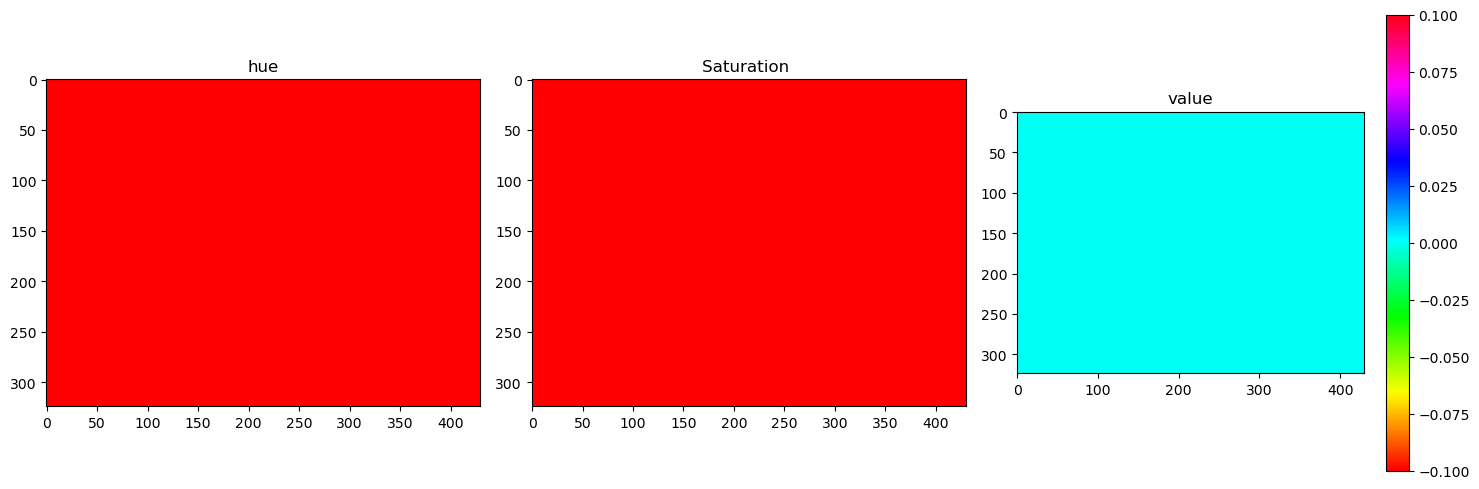

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img1_HSV[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(img1_HSV[:,:,1],cmap='hsv')
ax[1].set_title('Saturation ')
ax[2].imshow(img1_HSV[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(plt.imshow(img1_HSV[:,:,0],cmap='hsv')) 
fig.tight_layout()

# Bài 2

In [170]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io, measure

In [171]:
img_path = "C:/Users/trand/Documents/Digital Image Processing/Biến hình xử lý ảnh/Dataset/Lung.png"

(480, 480)


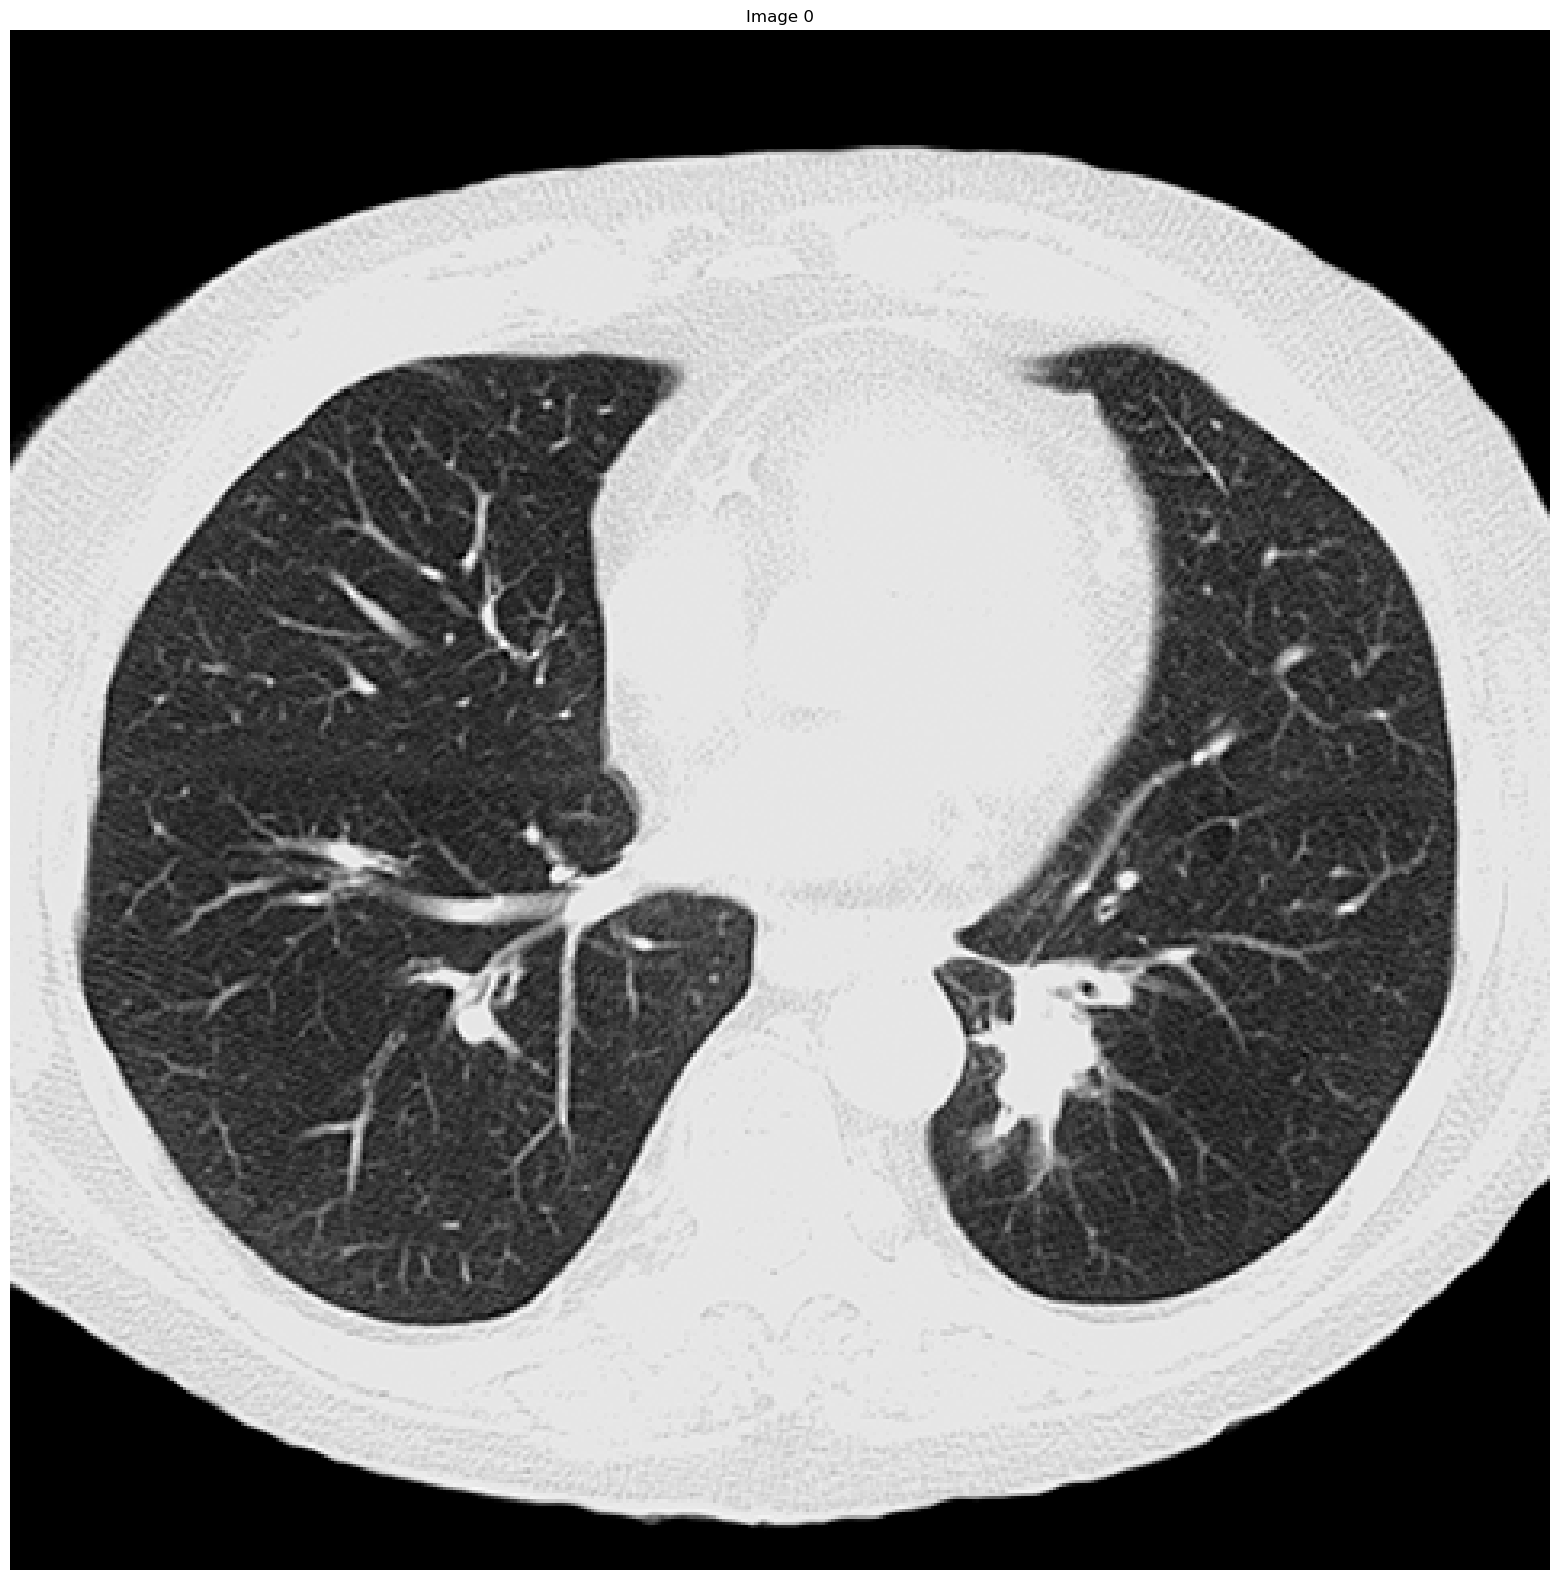

In [172]:
#read image
img2_og = plt.imread(img_path)
print(img2_og.shape)
img2_gray = img2_og
ShowImage([img2_gray],1,1)

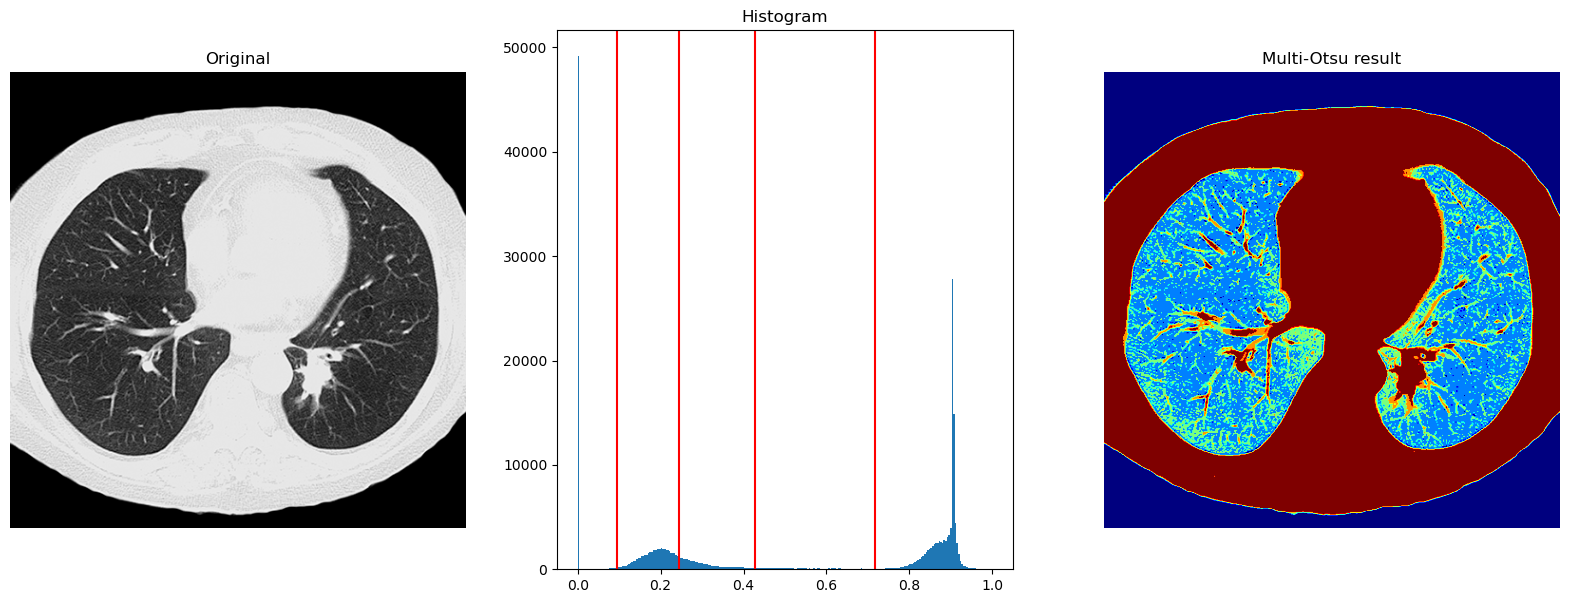

In [181]:
from skimage.filters import threshold_multiotsu
# Applying multi-Otsu threshold for the default value, generating
# five classes.
thresholds = threshold_multiotsu(img2_gray,classes=5)
# Using the threshold values, we generate the three regions.
regions = np.digitize(img2_gray, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
# Plotting the original image.
ax[0].imshow(img2_gray, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img2_gray.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')
# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')
plt.subplots_adjust()
plt.show()

In [182]:
img_path = "C:/Users/trand/Documents/Digital Image Processing/Biến hình xử lý ảnh/Dataset/Cloths.jpg"

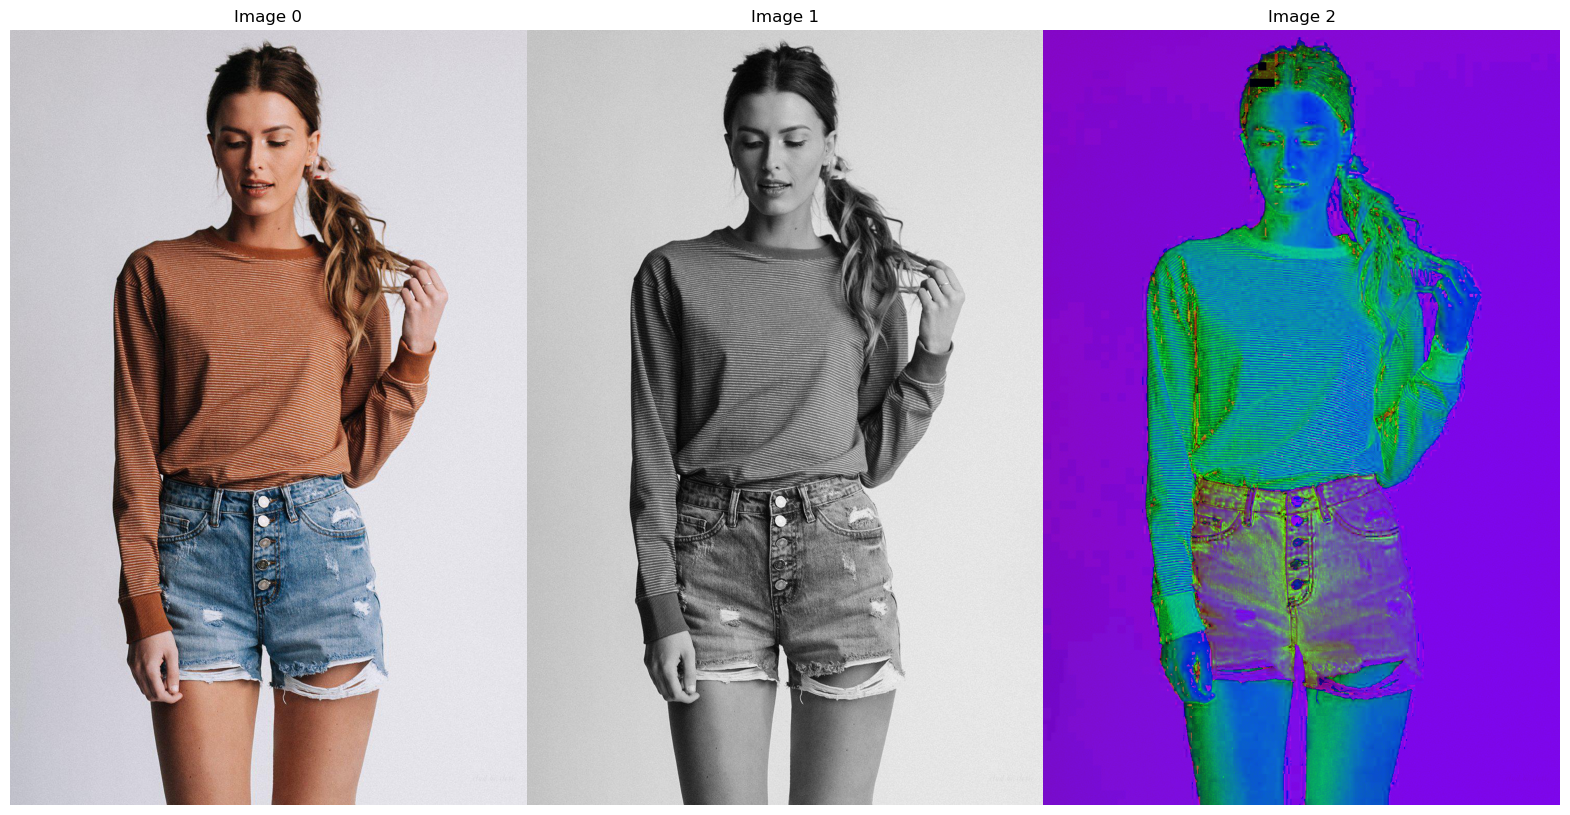

In [183]:
#Read image in RGB color space
img3_og = plt.imread(img_path)
#Convert into gray
img3_gray = cv2.cvtColor(img3_og,cv2.COLOR_RGB2GRAY)
#Conver into HSV color space
img3_HSV = cv2.cvtColor(img3_og,cv2.COLOR_RGB2HSV)

ShowImage([img3_og,img3_gray,img3_HSV],1,3)

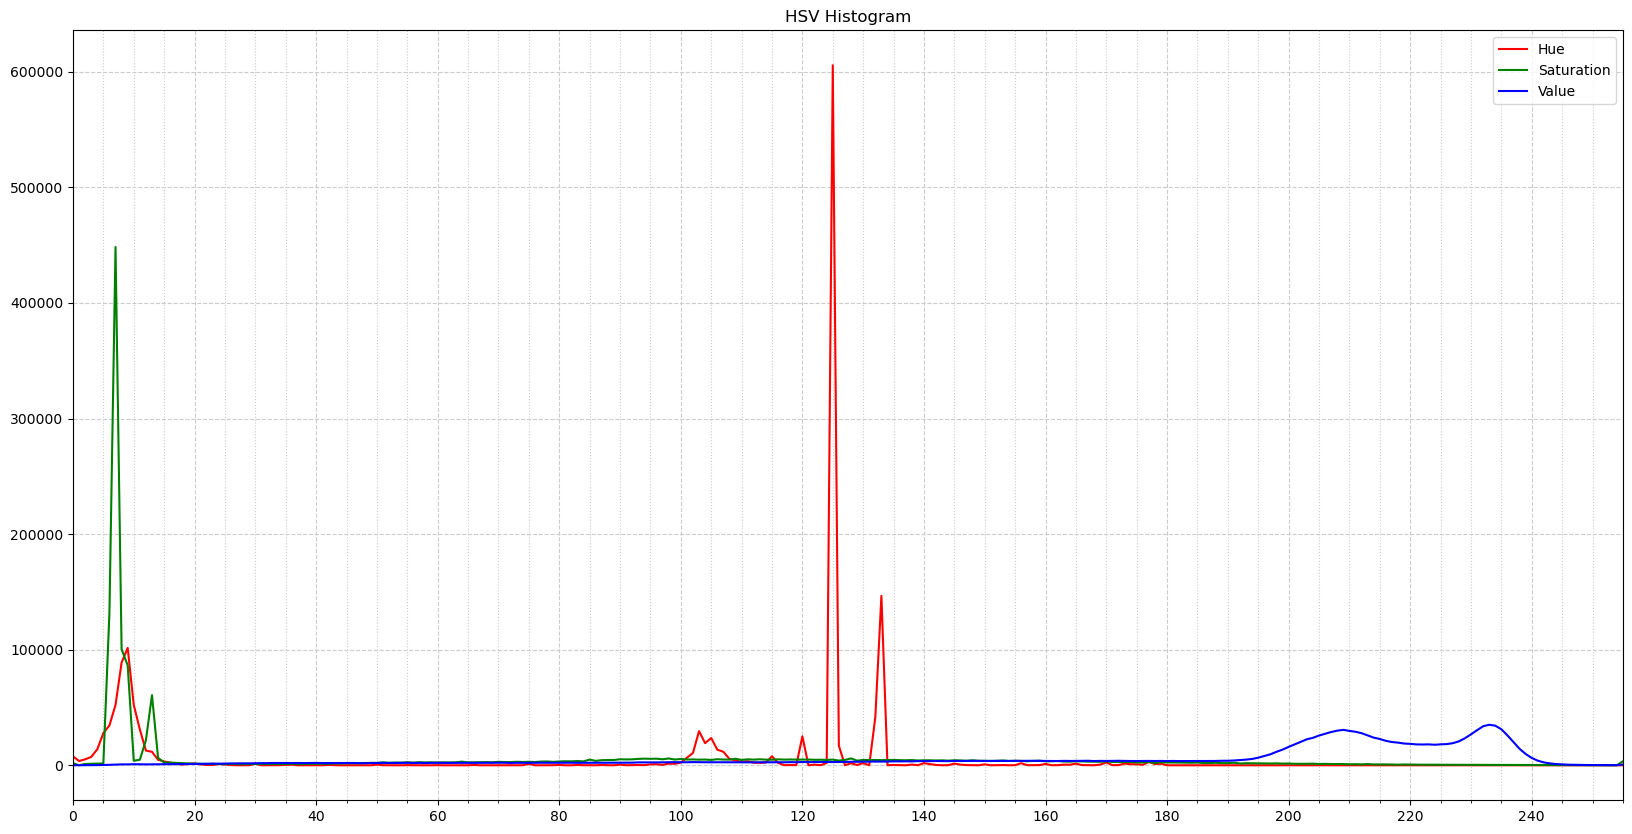

In [184]:
ShowHistogram(img3_HSV, Title = "HSV Histogram", ChannelList = ["Hue", "Saturation", "Value"])

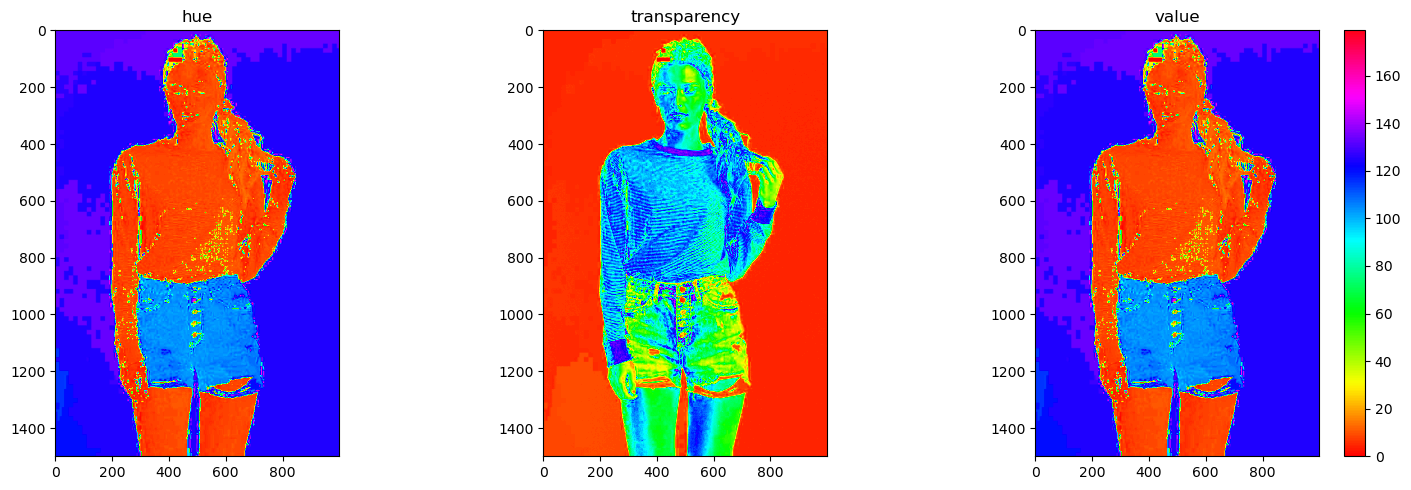

In [185]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img3_HSV[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(img3_HSV[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(img3_HSV[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(plt.imshow(img3_HSV[:,:,0],cmap='hsv')) 
fig.tight_layout()

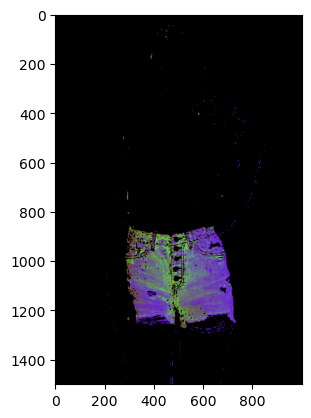

In [186]:
#refer to hue channel (in the colorbar)
lower_mask = img3_HSV[:,:,0] > 100
#refer to hue channel (in the colorbar)
upper_mask = img3_HSV[:,:,0] < 130
#refer to transparency channel (in the colorbar)
saturation_mask = img3_HSV[:,:,1] > 19

mask = upper_mask*lower_mask*saturation_mask
red = img3_HSV[:,:,0]*mask
green = img3_HSV[:,:,1]*mask
blue = img3_HSV[:,:,2]*mask
short_trousers_masked = np.dstack((red,green,blue))
plt.imshow(short_trousers_masked)

In [187]:
lower_val = np.array([30, 19, 85])
upper_val = np.array([145, 255, 245])
# Create mask based on color range
mask = cv2.inRange(img3_HSV, lower_val, upper_val)
# Apply the mask
masked_image = cv2.bitwise_and(img3_og, img3_og, mask=mask)

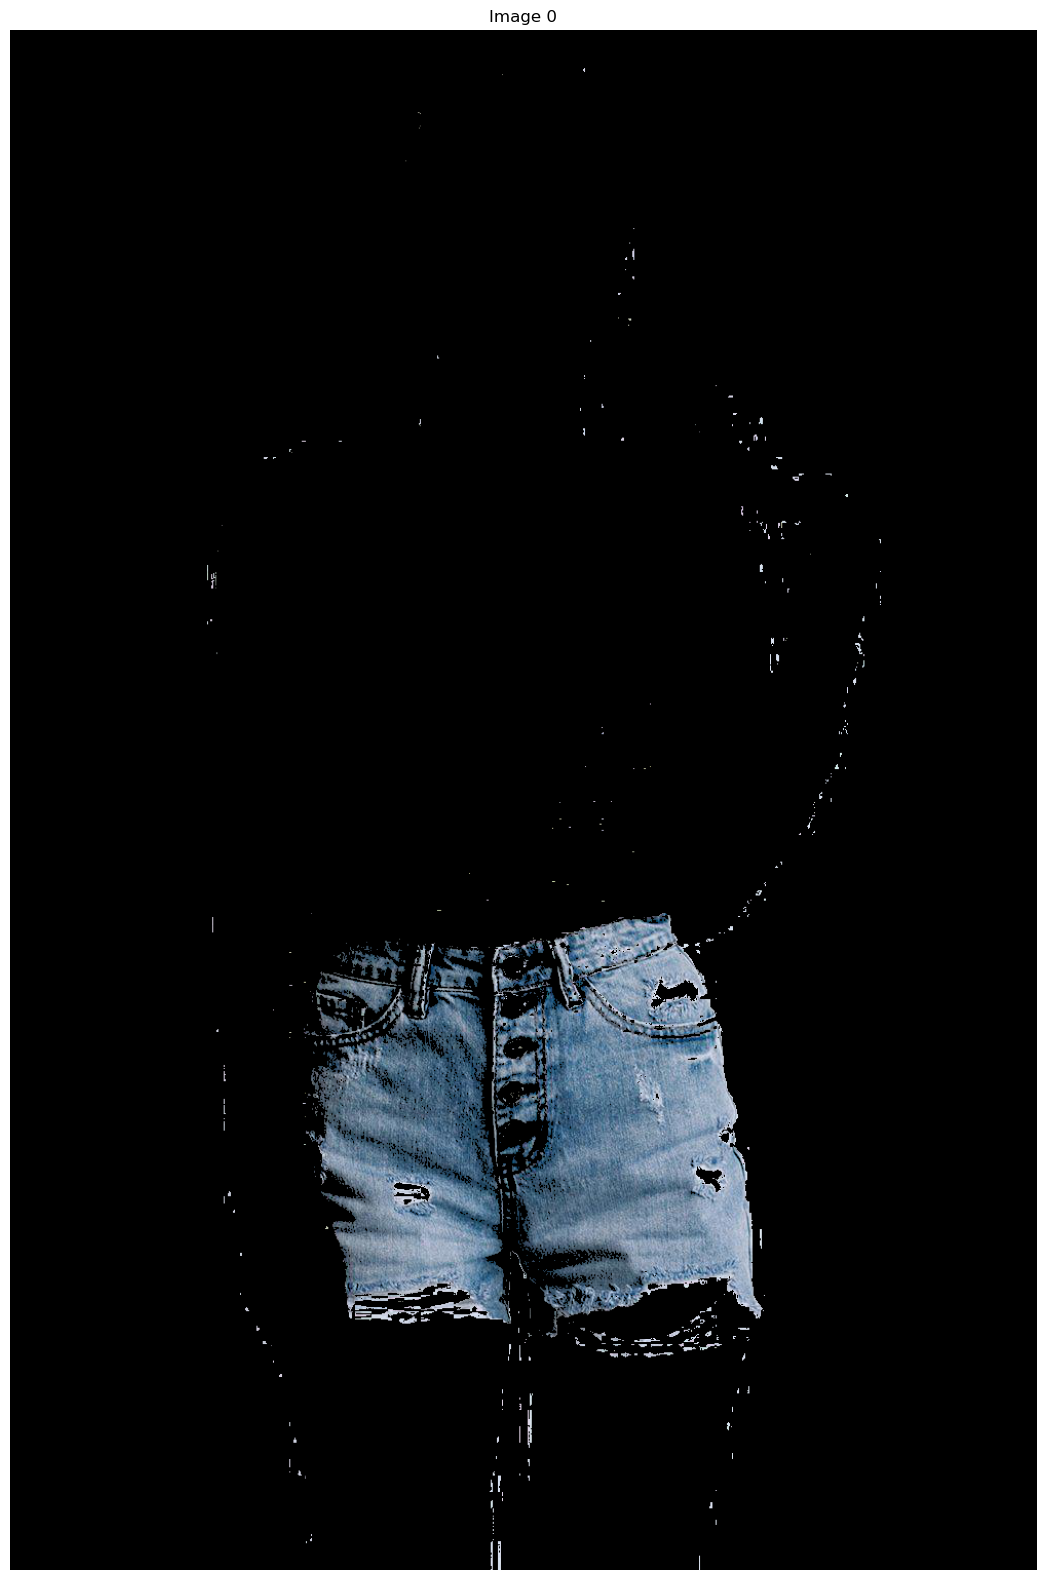

In [188]:
ShowImage([masked_image],1,1)